In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
current_dir = '/content/drive/MyDrive/Apziva/Happy Customers/'

In [124]:
data_dir =current_dir + 'happy-customers.csv'

In [125]:
# Start with loading all necessary libraries


import numpy as np
import pandas as pd


#visualizing data
import seaborn as sns  
import matplotlib.pyplot as plt 
import time

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


#feature selection
from sklearn.feature_selection import SelectFromModel


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Model Training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV


#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score



In [126]:
df  = pd.read_csv(data_dir)

In [127]:
df.head()

Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5

# Feature Engineering: 


Create sum of features

In [128]:
df['sum_features'] = df['X1'] + df['X2'] + df['X3'] + df['X4'] + df['X5'] + df['X6']

In [129]:
df['prop_features'] = df['sum_features']/30

In [130]:
df

Y  X1  X2  X3  X4  X5  X6  sum_features  prop_features
0    0   3   3   3   4   2   4            19       0.633333
1    0   3   2   3   5   4   3            20       0.666667
2    1   5   3   3   3   3   5            22       0.733333
3    0   5   4   3   3   3   5            23       0.766667
4    0   5   4   3   3   3   5            23       0.766667
..  ..  ..  ..  ..  ..  ..  ..           ...            ...
121  1   5   2   3   4   4   3            21       0.700000
122  1   5   2   3   4   2   5            21       0.700000
123  1   5   3   3   4   4   5            24       0.800000
124  0   4   3   3   4   4   5            23       0.766667
125  0   5   3   2   5   5   5            25       0.833333

[126 rows x 9 columns]

In [131]:
df.describe().T

count       mean       std        min        25%        50%  \
Y              126.0   0.547619  0.499714   0.000000   0.000000   1.000000   
X1             126.0   4.333333  0.800000   1.000000   4.000000   5.000000   
X2             126.0   2.531746  1.114892   1.000000   2.000000   3.000000   
X3             126.0   3.309524  1.023440   1.000000   3.000000   3.000000   
X4             126.0   3.746032  0.875776   1.000000   3.000000   4.000000   
X5             126.0   3.650794  1.147641   1.000000   3.000000   4.000000   
X6             126.0   4.253968  0.809311   1.000000   4.000000   4.000000   
sum_features   126.0  21.825397  3.396656  11.000000  20.000000  22.000000   
prop_features  126.0   0.727513  0.113222   0.366667   0.666667   0.733333   

                75%   max  
Y               1.0   1.0  
X1              5.0   5.0  
X2              3.0   5.0  
X3              4.0   5.0  
X4              4.0   5.0  
X5              4.0   5.0  
X6              5.0   5.0  
sum_features   24.0  30.0  
prop_features   0.8   1.0

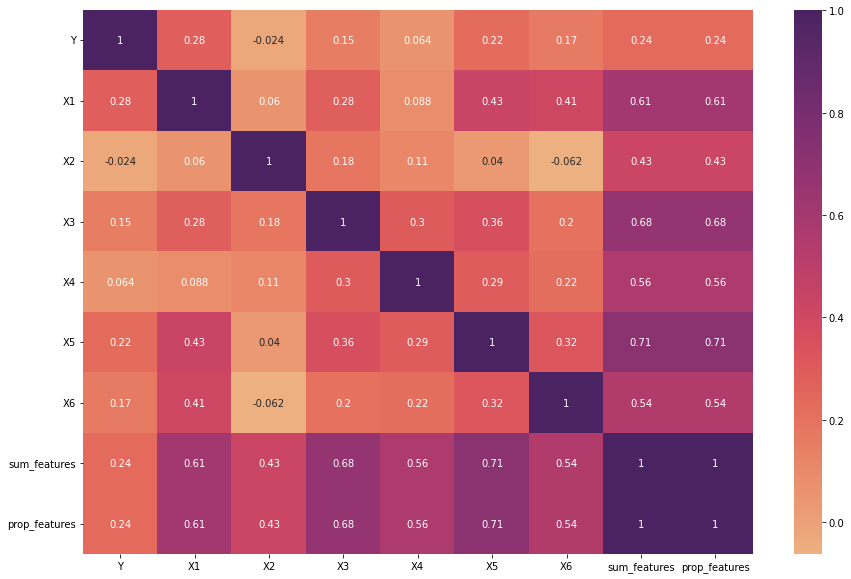

In [132]:
fig, ax = plt.subplots(figsize=(15,10))  
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="flare")

Prop_features will be selected since they're similarly correlated with the target (linear combination). 
X1 and X6 are the ones highest correlated features with the target.

# Manual Solution: Rule Based

Looking at both happy and unhappy customers, the happy ones have a sum of features of 22.5 on average. We will try to make some rule:

if sum_features < 22.5 then they are unhappy.

In [133]:
#sns.pairplot(df)

In [134]:
unhappy_df = df[df['Y'] == 0]

In [135]:
happy_df = df[df['Y'] == 1]

In [136]:
happy_df.describe().T

count       mean       std        min        25%        50%  \
Y               69.0   1.000000  0.000000   1.000000   1.000000   1.000000   
X1              69.0   4.536232  0.698311   3.000000   4.000000   5.000000   
X2              69.0   2.507246  1.106441   1.000000   2.000000   2.000000   
X3              69.0   3.449275  1.022342   1.000000   3.000000   3.000000   
X4              69.0   3.797101  0.900649   1.000000   3.000000   4.000000   
X5              69.0   3.884058  1.064621   1.000000   3.000000   4.000000   
X6              69.0   4.376812  0.768908   1.000000   4.000000   5.000000   
sum_features    69.0  22.550725  3.220049  14.000000  20.000000  22.000000   
prop_features   69.0   0.751691  0.107335   0.466667   0.666667   0.733333   

                     75%   max  
Y               1.000000   1.0  
X1              5.000000   5.0  
X2              3.000000   5.0  
X3              4.000000   5.0  
X4              4.000000   5.0  
X5              5.000000   5.0  
X6              5.000000   5.0  
sum_features   25.000000  30.0  
prop_features   0.833333   1.0

In [137]:
unhappy_df.describe().T

count       mean       std        min        25%   50%  \
Y               57.0   0.000000  0.000000   0.000000   0.000000   0.0   
X1              57.0   4.087719  0.851064   1.000000   4.000000   4.0   
X2              57.0   2.561404  1.134170   1.000000   2.000000   3.0   
X3              57.0   3.140351  1.007802   1.000000   3.000000   3.0   
X4              57.0   3.684211  0.848484   2.000000   3.000000   4.0   
X5              57.0   3.368421  1.189712   1.000000   3.000000   4.0   
X6              57.0   4.105263  0.838455   2.000000   3.000000   4.0   
sum_features    57.0  20.947368  3.424810  11.000000  19.000000  21.0   
prop_features   57.0   0.698246  0.114160   0.366667   0.633333   0.7   

                     75%   max  
Y               0.000000   0.0  
X1              5.000000   5.0  
X2              3.000000   5.0  
X3              4.000000   5.0  
X4              4.000000   5.0  
X5              4.000000   5.0  
X6              5.000000   5.0  
sum_features   23.000000  27.0  
prop_features   0.766667   0.9

In [138]:
#manual assignment
def happy_manual(sum_features):
  if sum_features < 22.55:
    return 0
  else:
    return 1


df['happiness'] = df['sum_features'].apply(lambda sum: happy_manual(sum))

In [139]:
df

Y  X1  X2  X3  X4  X5  X6  sum_features  prop_features  happiness
0    0   3   3   3   4   2   4            19       0.633333          0
1    0   3   2   3   5   4   3            20       0.666667          0
2    1   5   3   3   3   3   5            22       0.733333          0
3    0   5   4   3   3   3   5            23       0.766667          1
4    0   5   4   3   3   3   5            23       0.766667          1
..  ..  ..  ..  ..  ..  ..  ..           ...            ...        ...
121  1   5   2   3   4   4   3            21       0.700000          0
122  1   5   2   3   4   2   5            21       0.700000          0
123  1   5   3   3   4   4   5            24       0.800000          1
124  0   4   3   3   4   4   5            23       0.766667          1
125  0   5   3   2   5   5   5            25       0.833333          1

[126 rows x 10 columns]

In [140]:
df['count_happiness'] = df['Y'] == df['happiness']

In [141]:
df['count_happiness'].value_counts()

True     70
False    56
Name: count_happiness, dtype: int64

The simple rule based solution obtained an accuracy of 55% (This can be the baseline for ML solutions to beat).

In [142]:
70/126 * 100 

55.55555555555556

In [143]:
def conf_matrix(actual, predicted):
    """
      Function to generate confusion matrix from prediction and actual.

    """
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20},cmap="Blues")

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [144]:
#separate the Target and Features
target = df['Y'] 
features = df.drop(['Y', 'prop_features', 'happiness', 'count_happiness'], axis=1)

# Feature Selection with Random Forest

In [145]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state= 32) 

In [146]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=8, random_state=32, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(features.columns, clf.feature_importances_):
    print(feature)

('X1', 0.17868189061032308)
('X2', 0.15823842850310457)
('X3', 0.1700527062923894)
('X4', 0.07070101247471251)
('X5', 0.1187464170826504)
('X6', 0.08283562547706617)
('sum_features', 0.22074391955975403)


## Features that are Selected

We will select sum_features, X1, and X6.

In [147]:
new_features = features.drop(['X2','X3','X4', 'X5' ],axis=1)

In [148]:
new_features

X1  X6  sum_features
0     3   4            19
1     3   3            20
2     5   5            22
3     5   5            23
4     5   5            23
..   ..  ..           ...
121   5   3            21
122   5   5            21
123   5   5            24
124   4   5            23
125   5   5            25

[126 rows x 3 columns]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.20, random_state= 32) 

In [150]:
X_train

X1  X6  sum_features
28    3   4            17
99    3   4            20
72    4   4            20
112   4   4            18
91    5   5            23
..   ..  ..           ...
62    5   5            25
54    4   4            20
5     5   5            28
43    4   4            20
87    4   3            19

[100 rows x 3 columns]

In [151]:
X_test

X1  X6  sum_features
22    4   4            26
102   5   5            21
23    5   4            19
73    5   5            20
115   5   5            27
49    5   4            20
39    4   4            21
27    3   4            17
55    4   4            20
26    3   5            24
13    4   3            22
108   5   5            25
63    5   5            27
98    4   3            19
76    4   4            18
75    3   4            19
37    5   5            24
46    5   5            24
21    4   4            26
123   5   5            24
2     5   5            22
97    5   4            27
20    4   4            20
32    3   5            22
109   5   4            24
16    5   5            26

# Model 1 : Random Forest

In [152]:
rfc2 = RandomForestClassifier(n_estimators=8) #without parameter tuning

In [153]:
rfc2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=8)


The Training Score: 82.0 

The Accuracy is : 0.6538461538461539


              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



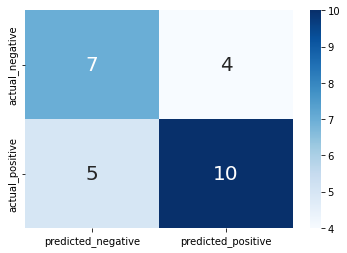

In [155]:
y_predict_RFC = rfc2.predict(X_test)
acc_RFC = accuracy_score(y_test, y_predict_RFC)
print("\nThe Training Score: {} \n".format(rfc2.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_RFC) )
cm_RFC = conf_matrix(y_test, y_predict_RFC)
print(classification_report(y_test, y_predict_RFC))

In [156]:
rfc2.feature_importances_

array([0.21135238, 0.20891005, 0.57973757])

## Conclusion for RF without parameter tuning

Obtained a 65% accuracy. The most important feature is sum_features.

## RF with param Tuning

In [157]:
RFC = RandomForestClassifier(n_estimators=8)
n_estimators = [5, 6, 8] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = RFC,param_distributions = random_grid,
               n_iter = 100, cv = 10, verbose=2, random_state=32, n_jobs = -1)

In [158]:
rf_random.fit(new_features, target)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=8),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 6, 8]},
                   random_state=32, verbose=2)

In [159]:
scores = cross_val_score(rf_random, new_features, target, cv=10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [160]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.10



The Training Score: 76.0 

The Accuracy is : 0.8076923076923077


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.86      0.80      0.83        15

    accuracy                           0.81        26
   macro avg       0.80      0.81      0.81        26
weighted avg       0.81      0.81      0.81        26



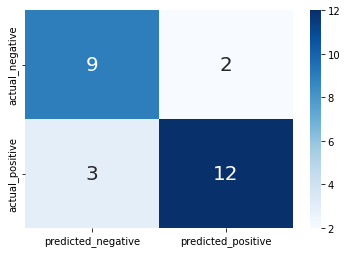

In [161]:
y_predict_RFC = rf_random.best_estimator_.predict(X_test)
acc_RFC = accuracy_score(y_test, y_predict_RFC)
print("\nThe Training Score: {} \n".format(rf_random.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_RFC) )
cm_RFC = conf_matrix(y_test, y_predict_RFC)
print(classification_report(y_test, y_predict_RFC))

With hyperparameter tuning we obtained a 59 % CV accuracy and on the testing set we obtained a 81% accuracy. 

## Visualize one Tree

In [162]:
estimator = rf_random.best_estimator_.estimators_[0]

In [163]:
estimator

DecisionTreeClassifier(max_depth=60, max_features='auto', min_samples_split=6,
                       random_state=2145185406)

In [164]:
estimators = rf_random.best_estimator_.estimators_

In [165]:
from sklearn import tree

In [166]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = new_features.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [167]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [168]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [169]:
# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# for index, estimator in enumerate(estimators):
#   tree.plot_tree(estimator,
#                    feature_names = new_features.columns, 
#                    class_names=['0', '1'],
#                    filled = True,
#                    ax = axes[index]);

#   axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_5trees.png')

# XGboost Model

In [170]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [171]:
def xgb_classifier(X_train, X_test, y_train, y_test, cv_folds = 5, early_stopping_rounds=50):


   params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(5, 10), # default 100
    "subsample": uniform(0.6, 0.4)
    }
#    param_test = {
#    "colsample_bytree": list(uniform(0.7, 0.3)),
#     "gamma": list(uniform(0, 0.5)),
#     "learning_rate": list(uniform(0.03, 0.3)), # default 0.1 
#     "max_depth": list(randint(2, 6)), # default 3
#     "n_estimators": list(randint(100, 150)), # default 100
#     "subsample": list(uniform(0.6, 0.4)),
#     'gamma':[i/10.0 for i in range(0,5)],
# }

   gsearch = RandomizedSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
   min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
   objective= 'binary:logistic', nthread=2,seed=27), 
   param_distributions= params, scoring='accuracy',n_jobs=4, cv=10)

    # alg = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
    #                     min_child_weight=3, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
    #                     objective='binary:logistic', nthread=4, seed=32)

  

    # search = RandomizedSearchCV(alg, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

    
    # if use_cv:
    #     print('Start Feeding in the data:')
    #     xgb_params = alg.get_xgb_params()
    #     xgb_train = xgb.DMatrix(X_train.values,label=y_train.values)
    #     cv_result = xgb.cv(xgb_params,xgb_train,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,early_stopping_rounds=early_stopping_rounds)
    #     alg.set_params(n_estimators=cv_result.shape[0])

   print('Training start:')
   gsearch.fit(X_train,y_train)

   print("Start Predicting")
   predictions = gsearch.predict(X_test)
   pred_proba = gsearch.predict_proba(X_test)[:, 1]

   print(' Accuracy score: ', accuracy_score(y_test,predictions))

   conf_matrix(y_test,predictions)

   #feat_imp = gsearch.feature_importances_
   #feat = X_train.columns.tolist()
   # clf.best_estimator_.booster().get_fscore()
   #res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
   #res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
   sorted_idx = gsearch.best_estimator_.feature_importances_.argsort()
   plt.figure(figsize=(10,10))
   plt.barh(X_train.columns[sorted_idx], gsearch.best_estimator_.feature_importances_[sorted_idx])
   plt.xlabel("Xgboost Feature Importance")
   plt.ylabel('Feature Importance Score')
   plt.show()
   #  print(res_df)
   #  print(res_df["Features"].tolist())

    


Training start:
Start Predicting
 Accuracy score:  0.46153846153846156


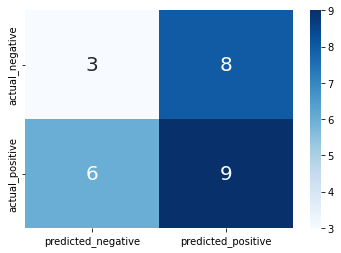

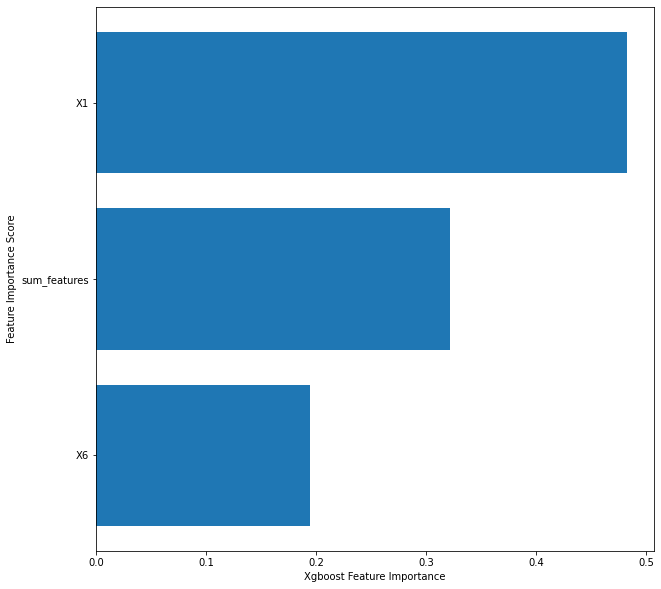

Total Time is:  0.05727241039276123


In [172]:
start = time.time()
xgb_classifier(X_train, X_test, y_train, y_test,)
print("Total Time is: ", (time.time() - start)/60)

XGboost was not able to beat the baseline, also lost to random forest classifier.

# Logistic Regression

In [173]:
trans = StandardScaler()
data = trans.fit_transform(new_features)

In [174]:
new_features_scaled = data

In [175]:
clf = LogisticRegressionCV(cv=5, random_state=30).fit(new_features_scaled, target)

In [176]:
best_clf = clf.fit(new_features,target)

In [177]:
scores = cross_val_score(best_clf, new_features,target, cv=5)

In [178]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.56 accuracy with a standard deviation of 0.12



The Training Score: 76.0 

The Accuracy is : 0.46153846153846156


              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.53      0.67      0.59        15

    accuracy                           0.46        26
   macro avg       0.41      0.42      0.41        26
weighted avg       0.42      0.46      0.43        26



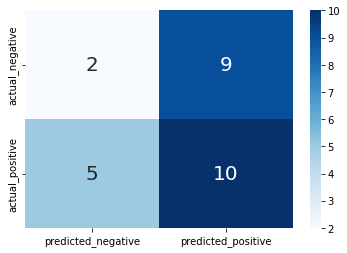

In [179]:
y_predict_logit = best_clf.predict(X_test)
acc_logit = accuracy_score(y_test, y_predict_logit)
print("\nThe Training Score: {} \n".format(rf_random.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_logit))
cm_logit = conf_matrix(y_test, y_predict_logit)
print(classification_report(y_test, y_predict_logit))

# SVM

In [189]:
svm_estimator = svm.SVC()
pipeline = Pipeline([('scale', StandardScaler()),# Scale inputs
                    ('svc', svm_estimator)])

svm_param_grid = {'svc__C': [0.1,1, 10, 100], 'svc__gamma': [1,0.1,0.01,0.001],'svc__kernel': ['rbf', 'poly', 'sigmoid']}


# train the model
svm_random_cv = RandomizedSearchCV(estimator=pipeline, param_distributions=svm_param_grid, n_iter=5, scoring='accuracy', cv=5, verbose=False)

svm_random_cv.fit(new_features, target)
svm_random_cv.best_score_




0.5953846153846153

In [190]:
# predict
y_pred_svm =svm_random_cv.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm), 2)))


Accuracy score to test set: 0.5




The Training Score: 66.0 

The Accuracy is : 0.5


              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.55      0.73      0.63        15

    accuracy                           0.50        26
   macro avg       0.44      0.46      0.43        26
weighted avg       0.46      0.50      0.46        26



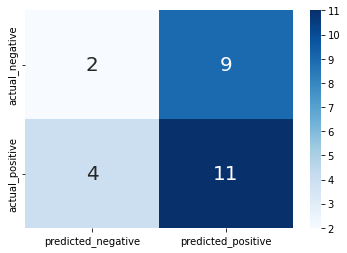

In [191]:
y_predict_svm = svm_random_cv.predict(X_test)
acc_svm = accuracy_score(y_test, y_predict_svm)
print("\nThe Training Score: {} \n".format(svm_random_cv.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_svm))
cm_svm = conf_matrix(y_test, y_predict_svm)
print(classification_report(y_test, y_predict_svm))

# Naive Bayes



In [192]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01873817422860384)


In [193]:
y_pred_nb = nbModel_grid.predict(X_test)


The Training Score: 63.0 

The Accuracy is : 0.4230769230769231


              precision    recall  f1-score   support

           0       0.30      0.27      0.29        11
           1       0.50      0.53      0.52        15

    accuracy                           0.42        26
   macro avg       0.40      0.40      0.40        26
weighted avg       0.42      0.42      0.42        26



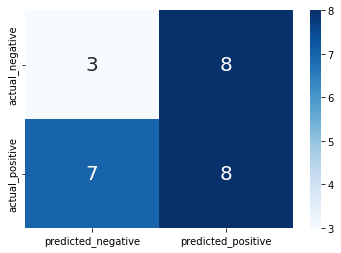

In [194]:

acc_nb = accuracy_score(y_test, y_pred_nb)
print("\nThe Training Score: {} \n".format(nbModel_grid.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_nb))
cm_nb = conf_matrix(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
clf = DecisionTreeClassifier(random_state=32)

In [202]:
score = cross_val_score(clf, new_features, target, cv=10)

In [203]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), scores.std()))

0.56 accuracy with a standard deviation of 0.12


# Conclusion

The random forest classifier performs the best with an 81% accuracy.